
 #  Control Structures, DataFrames and Descriptive Statistics

## PETE 2061 Lab 4

<a id='top'></a>

<a id='overview'></a>
# Topics Covered
<font color=blue>
 * [Control structures and functions](#control)
 * [Exiting loops](#exit_loops)
 * [Nested loops](#nested_loops)
 * [List Comprehension](#list_comprehension)
 * [Pandas Series](#series)
 * [Pandas DataFrames](#dataframes)
 * [Grouping](#grouping)    
 * [Interactive input](#input)</font>
<br>

<a id='control'></a>
## Control Structures 
<font color=blue>
* if-else
* for loops, while loops
* break: jump out of the current loop
* continue: jump to the top of next cycle within the loop
* pass: do nothing 
</font> 
[top](#top)

An "if statement" is written using the "if" keyword

In [85]:
a = 10
b = 20
if b > a:
    print("b is greater than a")

b is greater than a


* As in the "for" and "while" statements, indentation is important.
* Use the "tab" key for indentation
* As in the "for" and "while" statements, do not forget the colon (:) after the if statement!

In [86]:
if b > a:
print("b is greater than a")   # This will give an error because there is no indentation after the if statement

IndentationError: expected an indented block (<ipython-input-86-6c66c739cf81>, line 2)

* The elif keyword is pythons way of saying "if the previous conditions were not true, then try this condition".
* It basically means "else if"

In [87]:
a = 10
b = 10
if b > a:
    print("b is greater than a")
elif a == b:
    print("a and b are equal")

a and b are equal


The "else" keyword catches anything which isn't caught by the preceding conditions.

In [88]:
a = 20
b = 10
if b > a:
    print("b is greater than a")
elif a == b:
    print("a and b are equal")
else:
    print("a is greater than b")

a is greater than b


You can also have an else without the elif:

In [89]:
a = 20
b = 10
if b > a:
  print("b is greater than a")
else:
  print("b is not greater than a")

b is not greater than a


If you have only one statement to execute, you can put it on the same line as the if statement.

In [90]:
if a > b: print("a is greater than b")

a is greater than b


If you have only one statement to execute, one for if, and one for else, you can put it all on the same line:

In [91]:
a = 10
b = 20
print("A") if a > b else print("B")

B


You can also have multiple else statements on the same line:

In [92]:
a = 10
b = 10
print("A") if a > b else print("=") if a == b else print("B")

=


* The "and" keyword is a logical operator, and can be used to combine conditional statements
* The "or" keyword is a logical operator, and can be used to combine conditional statements

In [93]:
a = 20
b = 30
c = 50
if a > b and c > a:
    print("Both conditions are True")

if a > b or a > c:   #note that I do not indent this if statement, so that it is not nested under the previous if statement
    print("At least one of the conditions is True")

You can have if statements inside if statements, this is called nested if statements.

In [94]:
x = 40
if x > 10:
    print("Above ten,")
    if x > 20:
        print("and also above 20!")
    else:
        print("but not above 20.")

Above ten,
and also above 20!


<a id='exit_loops'></a>
## Using break and continue statements in loops
* With the break statement we can stop the loop before it has looped through all the items
* With the continue statement we can stop the current iteration of the loop, and continue with the next

In [95]:
fruits = ["apple","kiwi", "banana", "cherry", "orange"]
for x in fruits:
    print(x) 
    if x == "banana":
        break

#Can you modify this code snippet so that it breaks out of the loop before printing banana?    

apple
kiwi
banana


In [96]:
fruits = ["apple","kiwi", "banana", "cherry", "orange"]
for x in fruits:
    if x == "banana":
        continue
    print(x)

apple
kiwi
cherry
orange


<a id='nested_loops'></a>
## Nested Loops
* A nested loop is a loop inside a loop.
* The "inner loop" will be executed one time for each iteration of the "outer loop":

In [97]:
adj = ["red", "big", "tasty"]
fruits = ["apple", "banana", "cherry"]

for x in adj:
    for y in fruits:
        print(x, y)

red apple
red banana
red cherry
big apple
big banana
big cherry
tasty apple
tasty banana
tasty cherry


* Nested loops are commonly used in multi-dimensional calculations
* For two-dimensional reservoir simulation, for example, You can loop first through the y axes, then the x axis

In [98]:
import numpy as np
Res = np.zeros((3,4))
#Note that the outer loop is the y axis (with index j), so that we always cycle through the x axis first!
for j in range(4):  
    for i in range(3):
        Res[i,j] = i*j
print(Res)   


[[0. 0. 0. 0.]
 [0. 1. 2. 3.]
 [0. 2. 4. 6.]]


<a id='list_comprehension'></a>
## List comprehension in Python 
* The syntax for list comprehension in Python is "list comprehension [expr for var in list]"

In [99]:
my_list=[2,5,9,1]
square = [x**2 for x in my_list]
print("square =", square)

#if statements can also be used in the expression within the square brackets
large = [n for n in my_list if n >= 5]
print('large =',large)

square = [4, 25, 81, 1]
large = [5, 9]


<a id='series'></a>
## Pandas Series
* The first main data type we will learn about from the Pandas package is the Series data type.
* Let's import Pandas and explore the Series object.
* A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object).
* What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. 
* It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

In [100]:
import numpy as np
import pandas as pd

### Creating a Series
You can convert a list,numpy array, or dictionary to a Series:

In [101]:
labels = ['a','b','c']      # list of alphabets that can be used as labels
my_list = [10,20,30]        # list of numbers
arr = np.array([10,20,30])  # 1D array of numbers
d = {'a':10,'b':20,'c':30}  # dictionary

** Using Lists **

In [102]:
pd.Series(data=my_list)     # converts list of numbers into a Pandas Series. First argument is list containing data
#default index will start from 0 and end at the length of the series - 1.

0    10
1    20
2    30
dtype: int64

In [103]:
pd.Series(data=my_list,index=labels)  # 1st argument is data, and second argument is index for the rows of the data

a    10
b    20
c    30
dtype: int64

In [104]:
pd.Series(my_list,labels)    # without specifying "data=" and "index="", the first two arguments of the pd.Series
                             #  method will refer to the data and index by default.

a    10
b    20
c    30
dtype: int64

** NumPy Arrays **

In [105]:
pd.Series(arr)               # first argument defaults to data

0    10
1    20
2    30
dtype: int64

In [106]:
pd.Series(arr,labels)   # 1st argument defaults to data, second argument defaiults to index for the rows of the data

a    10
b    20
c    30
dtype: int64

** Dictionary**

In [107]:
pd.Series(d)            # the keys and values of the dictionary correspond to the index and data of the series.

a    10
b    20
c    30
dtype: int64

### Data in a Series
A pandas Series can hold a variety of object types:

In [108]:
pd.Series(data=labels)   #Series can also hold a list of characters, which is what is stored in labels
#default index will start from 0 and end at the length of the series - 1.

0    a
1    b
2    c
dtype: object

## Using an Index
* The key to using a Series is understanding its index. 
* Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).
* Let's see some examples of how to grab information from a Series. Let us create two sereis, ser1 and ser2:

In [109]:
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [110]:
ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany','Italy', 'Japan'])
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

In [111]:
ser1['USA']

1

Operations are then also done based off of index:

In [112]:
ser1 + ser2     #Notice that data with common index get added. NaN for data with unreconcilable indices

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

<a id='dataframes'></a>
## Pandas DataFrames 
* Works like a Spreadsheet (eg. Excel)
* It has several in-built functions for descriptive statistics 
* It can be used for data input and output (io)
* It can be created from a dictionary
* We can think of a DataFrame as a bunch of Series objects put together to share the same index. 

In [113]:
import pandas as pd
import numpy as np

In [114]:
from numpy.random import randn   # this is how to import a specific function from a package
np.random.seed(101)              # Using a seed ensures the same random number is obtained everytime the code is run

In [115]:
myIndex = 'A B C D E'.split()  #This creates a list ['A','B','C','D','E']
print(myIndex)
print(type(myIndex))

['A', 'B', 'C', 'D', 'E']
<class 'list'>


In [116]:
myRand = randn(5,4)                # creates a 5x4 matrix of random numbers from the standard normal distribution
myRand2 = np.random.random((5,4))  # creates a 5x4 matrix of random numbers from the continuous uniform distribution 
print(myRand)
print(myRand2)
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df
#1st argument is data, 2nd argument is index for the rows, third is column headings.

[[ 2.70684984  0.62813271  0.90796945  0.50382575]
 [ 0.65111795 -0.31931804 -0.84807698  0.60596535]
 [-2.01816824  0.74012206  0.52881349 -0.58900053]
 [ 0.18869531 -0.75887206 -0.93323722  0.95505651]
 [ 0.19079432  1.97875732  2.60596728  0.68350889]]
[[0.73481906 0.54196177 0.91315356 0.80792015]
 [0.40299783 0.35722434 0.95287671 0.34363158]
 [0.86509982 0.83027771 0.53816145 0.92246937]
 [0.09714648 0.10284749 0.7015073  0.89047987]
 [0.1595603  0.27557254 0.67249153 0.16430312]]


W         X         Y         Z
A -0.116773  1.901755  0.238127  1.996652
B -0.993263  0.196800 -1.136645  0.000366
C  1.025984 -0.156598 -0.031579  0.649826
D  2.154846 -0.610259 -0.755325 -0.346419
E  0.147027 -0.479448  0.558769  1.024810

In [117]:
help(randn)   # the help function gives a description of the function specified as an argument

Help on built-in function randn:

randn(...) method of mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    If positive, int_like or int-convertible arguments are provided,
    `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1 (if any of the :math:`d_i` are
    floats, they are first converted to integers by truncation). A single
    float randomly sampled from the distribution is returned if no
    argument is provided.
    
    This is a convenience function.  If you want an interface that takes a
    tuple as the first argument, use `numpy.random.standard_normal` instead.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should be all positive.
        If no argument is given a single Python float is ret

In [118]:
help(np.random.random)

Help on built-in function random_sample:

random_sample(...) method of mtrand.RandomState instance
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None``, in which
        case a single float is returned).
    
    Examples
    --------
    >>> np.random.random_sample()
    0.47108547995356098
    >>> type(np.random.random_

## Selection and Indexing
This refers to the various methods to grab data from a DataFrame

In [119]:
df['W']

A   -0.116773
B   -0.993263
C    1.025984
D    2.154846
E    0.147027
Name: W, dtype: float64

In [120]:
# Pass a list of column names
df[['W','Z']]   # Note the square brackets defining the list ['W','Z']

W         Z
A -0.116773  1.996652
B -0.993263  0.000366
C  1.025984  0.649826
D  2.154846 -0.346419
E  0.147027  1.024810

In [121]:
# DataFrame Columns are just Series
type(df['W'])

pandas.core.series.Series

**Creating a new column:**

In [122]:
df['new'] = df['W'] + df['Y']
df

W         X         Y         Z       new
A -0.116773  1.901755  0.238127  1.996652  0.121354
B -0.993263  0.196800 -1.136645  0.000366 -2.129908
C  1.025984 -0.156598 -0.031579  0.649826  0.994405
D  2.154846 -0.610259 -0.755325 -0.346419  1.399521
E  0.147027 -0.479448  0.558769  1.024810  0.705796

Removing Columns

In [123]:
df.drop('new',axis=1)   # axis = 1 means it is dropping a column

W         X         Y         Z
A -0.116773  1.901755  0.238127  1.996652
B -0.993263  0.196800 -1.136645  0.000366
C  1.025984 -0.156598 -0.031579  0.649826
D  2.154846 -0.610259 -0.755325 -0.346419
E  0.147027 -0.479448  0.558769  1.024810

In [124]:
# Not in-place unless specified!  (this means that the "new" column has not been removed in memory). So df is unchanged
df

W         X         Y         Z       new
A -0.116773  1.901755  0.238127  1.996652  0.121354
B -0.993263  0.196800 -1.136645  0.000366 -2.129908
C  1.025984 -0.156598 -0.031579  0.649826  0.994405
D  2.154846 -0.610259 -0.755325 -0.346419  1.399521
E  0.147027 -0.479448  0.558769  1.024810  0.705796

In [125]:
df.drop('new',axis=1,inplace=True)    #this specification of inplace=True now drops the "new" column from df in memory
df

W         X         Y         Z
A -0.116773  1.901755  0.238127  1.996652
B -0.993263  0.196800 -1.136645  0.000366
C  1.025984 -0.156598 -0.031579  0.649826
D  2.154846 -0.610259 -0.755325 -0.346419
E  0.147027 -0.479448  0.558769  1.024810

In [126]:
# You can also drop rows this way
df.drop('E',axis=0)

W         X         Y         Z
A -0.116773  1.901755  0.238127  1.996652
B -0.993263  0.196800 -1.136645  0.000366
C  1.025984 -0.156598 -0.031579  0.649826
D  2.154846 -0.610259 -0.755325 -0.346419

In [127]:
df

W         X         Y         Z
A -0.116773  1.901755  0.238127  1.996652
B -0.993263  0.196800 -1.136645  0.000366
C  1.025984 -0.156598 -0.031579  0.649826
D  2.154846 -0.610259 -0.755325 -0.346419
E  0.147027 -0.479448  0.558769  1.024810

In [128]:
df.drop('E',axis=0,inplace=True)
df

W         X         Y         Z
A -0.116773  1.901755  0.238127  1.996652
B -0.993263  0.196800 -1.136645  0.000366
C  1.025984 -0.156598 -0.031579  0.649826
D  2.154846 -0.610259 -0.755325 -0.346419

** Selecting Rows**

In [129]:
df.loc['A']  #this will extract the first row, which corresponds to index A

W   -0.116773
X    1.901755
Y    0.238127
Z    1.996652
Name: A, dtype: float64

** Or select based off of position instead of label **

In [130]:
df.iloc[2]   #this will extract the 3rd row, which corresponds to index C

W    1.025984
X   -0.156598
Y   -0.031579
Z    0.649826
Name: C, dtype: float64

** Selecting subset of rows and columns **

In [131]:
df.loc['B','Y']  #will return data at row B, column Y

-1.1366445936091856

In [132]:
df.loc[['A','B'],['W','Y']]  #will return data in rows A and B, and columns W and Y

W         Y
A -0.116773  0.238127
B -0.993263 -1.136645

In [133]:
t = np.arange(0,10,0.1) #this creates a range of numbers from 0 to 10, evenly spaced in 0.1 increments
x = np.sin(t)
y = np.cos(t)
df = pd.DataFrame({'Time':t, 'x':x, 'y':y}) #This creates a dataframe with three columnns, time, x, and y, with the Column header names
df.head(5) #This shows the first (n) rows of the dataframe, if left blank it automatically gives 5 rows

Time         x         y
0   0.0  0.000000  1.000000
1   0.1  0.099833  0.995004
2   0.2  0.198669  0.980067
3   0.3  0.295520  0.955336
4   0.4  0.389418  0.921061

In [134]:
df.tail() #This will display the last (n) rows of the dataframe

Time         x         y
95   9.5 -0.075151 -0.997172
96   9.6 -0.174327 -0.984688
97   9.7 -0.271761 -0.962365
98   9.8 -0.366479 -0.930426
99   9.9 -0.457536 -0.889191

In [135]:
df['Time'][1:3] #It works from left to right. After selecting the Time column, select only the 2nd and 3rd rows.
#df.Time[1:3]  #This old approach works, but it is advisable to avoid this.

1    0.1
2    0.2
Name: Time, dtype: float64

In [136]:
df['Time'][-5:] #indexing works this way too. All you learned about index works

95    9.5
96    9.6
97    9.7
98    9.8
99    9.9
Name: Time, dtype: float64

In [137]:
data_sub = df[['Time', 'y']] #create a subset of only two columns of data out of the dataframe using title as index
data_sub.head()

Time         y
0   0.0  1.000000
1   0.1  0.995004
2   0.2  0.980067
3   0.3  0.955336
4   0.4  0.921061

In [138]:
df[['Time', 'y']][4:10] #Indexing both columnns and rows at the same time. This is BACKWARDS compared to numpy arrays!!!

Time         y
4   0.4  0.921061
5   0.5  0.877583
6   0.6  0.825336
7   0.7  0.764842
8   0.8  0.696707
9   0.9  0.621610

In [139]:
df.iloc[4:10, [0,2]] #Use the method iloc to use the numpy style of indexing (row/column)

Time         y
4   0.4  0.921061
5   0.5  0.877583
6   0.6  0.825336
7   0.7  0.764842
8   0.8  0.696707
9   0.9  0.621610

In [140]:
df.values[1:6] #use values if you want to see the raw numpy array data and not in the datafram format.
#This is typically used to convert Pandas DataFrames into Numpy Arrays.
#Here it gives the data in rows 1 to 5 (remember row 1 is 2nd row of data)

array([[0.1       , 0.09983342, 0.99500417],
       [0.2       , 0.19866933, 0.98006658],
       [0.3       , 0.29552021, 0.95533649],
       [0.4       , 0.38941834, 0.92106099],
       [0.5       , 0.47942554, 0.87758256]])

In [141]:
df.describe()  #This function gives you useful descriptive statistics on the dataframe

Time           x           y
count  100.000000  100.000000  100.000000
mean     4.950000    0.186474   -0.045161
std      2.901149    0.667424    0.726266
min      0.000000   -0.999923   -0.999693
25%      2.475000   -0.368329   -0.793512
50%      4.950000    0.315320   -0.079077
75%      7.425000    0.800989    0.687587
max      9.900000    0.999574    1.000000

<a id='grouping'></a>
## Group by
The groupby method allows you to group rows of data together and call aggregate functions

In [142]:
import pandas as pd
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
df = pd.DataFrame(data)
df

Company   Person  Sales
0    GOOG      Sam    200
1    GOOG  Charlie    120
2    MSFT      Amy    340
3    MSFT  Vanessa    124
4      FB     Carl    243
5      FB    Sarah    350

* Now you can use the .groupby() method to group rows together based off of a column name. 
* As an example, we can group by Company. This will create a DataFrameGroupBy object

In [143]:
df.groupby('Company')

You can save this object as a new variable:

In [144]:
by_comp = df.groupby("Company")

And then call aggregate methods off the object:

In [145]:
by_comp.mean()

Sales
Company       
FB       296.5
GOOG     160.0
MSFT     232.0

In [146]:
#This can all be done in a one-line Pythonic code:
df.groupby('Company').mean()

Sales
Company       
FB       296.5
GOOG     160.0
MSFT     232.0

More examples of aggregate methods:

In [147]:
by_comp.std()

Sales
Company            
FB        75.660426
GOOG      56.568542
MSFT     152.735065

In [148]:
by_comp.min()

Person  Sales
Company                
FB          Carl    243
GOOG     Charlie    120
MSFT         Amy    124

In [149]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [150]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [151]:
by_comp.describe().transpose()['GOOG']

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

In [152]:
data = pd.DataFrame({'Well Type':['o','o','g','o','g','g','g','o'],
                    'Well Depth':[3500,2800,3000,3233,3010,5500,3600,4840]})
data.head()

Well Type  Well Depth
0         o        3500
1         o        2800
2         g        3000
3         o        3233
4         g        3010

In [153]:
grouped = data.groupby('Well Type')
print(grouped.describe())

          Well Depth                                                         \
               count     mean          std     min      25%     50%     75%   
Well Type                                                                     
g                4.0  3777.50  1182.099122  3000.0  3007.50  3305.0  4075.0   
o                4.0  3593.25   879.792921  2800.0  3124.75  3366.5  3835.0   

                   
              max  
Well Type          
g          5500.0  
o          4840.0  


g         AxesSubplot(0.1,0.15;0.363636x0.75)
o    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

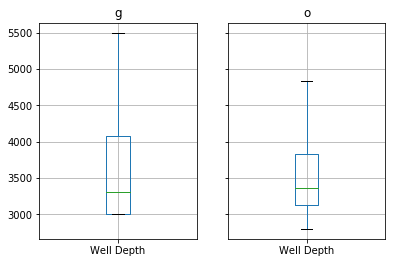

In [154]:
import matplotlib.pyplot as plt
grouped.boxplot()

In [155]:
df_oil = grouped.get_group('o')
values_oil = df_oil.values
print(values_oil)

[['o' 3500]
 ['o' 2800]
 ['o' 3233]
 ['o' 4840]]


In [156]:
type(grouped)

pandas.core.groupby.groupby.DataFrameGroupBy

<a id='input'></a>
## interactive input
You can use the input() function to read in input interactively. The input will be a string which can be converted into other data types as needed

In [157]:
numStr = input("Enter an integer: ")
num = int(numStr)
num2 = int(input("Enter an integer: "))

print(num,num2)

Enter an integer: 4
Enter an integer: 8
4 8
